In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [8]:
schema_matching_labelled_df = pd.read_csv("monitor_schema_matching_labelled_data.csv", sep=";")

In [9]:
schema_matching_labelled_df

,source,source_attribute_id,target_attribute_name
0,ca.pcpartpicker.com,hdmi,hdmi_port_quantity
1,www.best-deal-items.com,horizontal scan range,horizontal_refresh_rate_range
2,www.best-deal-items.com,horizontal scan range,horizontal_refresh_rate_max
3,www.best-deal-items.com,color support,number_of_colors
4,www.best-deal-items.com,hd type,hd_type
...,...,...,...
130,www.xpcpro.com,on screen display osd languages,supported_languages
131,www.xpcpro.com,digital vertical frequency,digital_vertical_refresh_rate_range
132,www.xpcpro.com,digital vertical frequency,digital_vertical_refresh_rate_max
133,www.xpcpro.com,ethernet lan connection,has_ethernet_port


In [20]:
def get_schema_matching_labelled_dict(schema_matching_labelled_df):
    schema_matching_labelled_dict = defaultdict(lambda: defaultdict(list))
    for _, row in schema_matching_labelled_df.iterrows():
        table = row["source"] 
        source_attribute = row["source_attribute_id"]   
        target_attr = row['target_attribute_name']

        schema_matching_labelled_dict[table][source_attribute].append(target_attr)
    
    return schema_matching_labelled_dict


In [26]:
def get_true_positive(schema_matching_labelled_dict, final_schema_matching):
    true_positive = 0
    for table, attributes in schema_matching_labelled_dict.items():
        for source_attribute, target_attributes_list in attributes.items():
            
            if source_attribute in final_schema_matching[table]:
                result = final_schema_matching[table][source_attribute]

                if result in target_attributes_list:
                    true_positive += 1

    return true_positive

In [27]:
def get_false_negative(schema_matching_labelled_dict, final_schema_matching):
    false_negative = 0
    for table, attributes in schema_matching_labelled_dict.items():
        for source_attribute, target_attributes_list in attributes.items():

            if source_attribute in final_schema_matching[table]:
                result = final_schema_matching[table][source_attribute]

                if result == "no matching":
                    false_negative += 1

    return false_negative

In [28]:
def get_false_positive(schema_matching_labelled_dict, final_schema_matching):
    false_positive = 0
    for table, attributes in schema_matching_labelled_dict.items():
        for source_attribute, target_attributes_list in attributes.items():
            
            if source_attribute in final_schema_matching[table]:
                result = final_schema_matching[table][source_attribute]

                if result not in target_attributes_list and result != "no matching":
                    false_positive += 1

    return false_positive

In [29]:
schema_matching_labelled_dict = get_schema_matching_labelled_dict(schema_matching_labelled_df)

In [30]:
with open("final_schema_matching.json", 'r', encoding='utf-8') as file:
    final_schema_matching = json.load(file)
true_positive = get_true_positive(schema_matching_labelled_dict, final_schema_matching)
false_positive = get_false_positive(schema_matching_labelled_dict, final_schema_matching)
false_negative = get_false_negative(schema_matching_labelled_dict, final_schema_matching)

In [31]:
print(f"True Postive: {true_positive}")
print(f"False Postive: {false_positive}")
print(f"False Negative: {false_negative}")

True Postive: 53
False Postive: 22
False Negative: 13


In [32]:
def get_precision(true_positive, false_positive):
    return true_positive/(true_positive + false_positive)

In [33]:
def get_recall(true_positive, false_negative):
    return true_positive/(true_positive + false_negative)

In [34]:
def get_f1_score(precision, recall):
    return 2 * (precision * recall)/(precision + recall)

In [35]:
precision = get_precision(true_positive, false_positive)
recall = get_recall(true_positive, false_negative)
f1_score = get_f1_score(precision, recall)
print(f"Precision: \t{precision}")
print(f"Recall: \t{recall}")
print(f"F1 Score: \t{f1_score}")

Precision: 	0.7066666666666667
Recall: 	0.803030303030303
F1 Score: 	0.75177304964539


In [36]:
''' This function generates a metrics chart'''
def generate_chart(precision, recall, f1_score):
    metrics = ['Precision', 'Recall', 'F1 Score']
    values = [precision, recall, f1_score]

    # Bar graph
    plt.figure(figsize=(6, 6))
    plt.bar(metrics, values, color=['blue', 'green', 'red'])

    # Adding values above the bars
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')

    # Adding Title and Labels to Axes
    plt.title('Evaluation metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Value')

    plt.ylim(0, 1)
    plt.show()

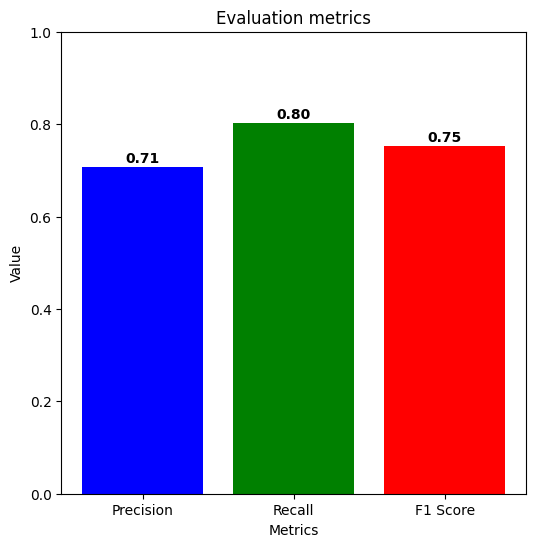

In [37]:
generate_chart(precision, recall, f1_score)